In [111]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('./data/restaurant_data.csv')
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [4]:
df = pd.read_csv('./data/restaurant_data.csv')
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


## 4
Test a hypothesis and construct a confidence interval for the difference in proportions of two populations.

- Statement of the problem: Test the hypothesis and build a confidence interval for the difference in the proportion of restaurants with **revenue over 500 000** between the sample of restaurants with parking and the sample without parking.

Null Hypothesis: $H_0: p_1 = p_2$

Alternative Hypothesis: $H_1: p_1 \neq p_2$


In [6]:
#Test a hypothesis and construct a confidence interval for the difference in proportions of two populations.
Parking = df[df['Parking Availability'] == 'Yes']['Revenue']
NoParking = df[df['Parking Availability'] == 'No']['Revenue']

n1 = len(Parking)
n2 = len(NoParking)
print("Number of Parking Availability: \nn1 =", n1)
print("Number of No Parking Availability: \nn2 =", n2)

Number of Parking Availability: 
n1 = 4189
Number of No Parking Availability: 
n2 = 4179


In [7]:
# Count the revenue > 500000
count_Parking = Parking[Parking > 500000].count()
count_NoParking = NoParking[NoParking > 500000].count()
print("Number of Parking Availability revenue > 500000: \nx1 =", count_Parking)
print("Number of No Parking Availability revenue > 500000: \nx2 =", count_NoParking)

Number of Parking Availability revenue > 500000: 
x1 = 2845
Number of No Parking Availability revenue > 500000: 
x2 = 2801


In [8]:
p1_hat = count_Parking / len(Parking)
p2_hat = count_NoParking / len(NoParking)
p_hat = (count_Parking + count_NoParking) / (len(Parking) + len(NoParking))
print("Sample proportion of Parking Availability p^1: ", p1_hat)
print("Sample proportion of No Parking Availability p^2: ", p2_hat)
print("Pooled proportion: ", p_hat)
print("Difference in sample proportions: ", p1_hat - p2_hat)

Sample proportion of Parking Availability p^1:  0.6791597039866316
Sample proportion of No Parking Availability p^2:  0.6702560421153386
Pooled proportion:  0.6747131931166348
Difference in sample proportions:  0.00890366187129299


In [9]:
z0 = (p1_hat - p2_hat) / (p_hat * (1 - p_hat) * (1 / n1 + 1 / n2)) ** 0.5 
print("Test statistic z0: ", z0)

Test statistic z0:  0.869273345134384


In [10]:
alpha = 0.05
z_alpha = stats.norm.ppf(1 - alpha / 2)
print("Critical value z_alpha: ", z_alpha)

if abs(z0) > z_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
    print("So we can not say that the proportion of revenue > 500000 is different between Parking Availability and No Parking Availability")

Critical value z_alpha:  1.959963984540054
Fail to reject the null hypothesis
So we can not say that the proportion of revenue > 500000 is different between Parking Availability and No Parking Availability


In [11]:
# Construct a confidence interval for the difference in proportions
CI = (p1_hat - p2_hat) + np.array([-1, 1]) * z_alpha * (p_hat * (1 - p_hat) * (1 / n1 + 1 / n2)) ** 0.5
print("95% confidence interval for the difference in proportions: ", CI)

95% confidence interval for the difference in proportions:  [-0.01117156  0.02897889]


## 5
Regression analysis. In this requirement, you are expected to complete
the following steps:

### (a)
Identify two random variables X and Y in your data.
→ For instance, X = height, Y = weight.

#### Preprocessing
The data set has many category columns so the first thing to do here is to select data according to certain categories.

For example:
```sql
SELECT Location, AVG(Revenue)
GROUP BY Location
```
| Location  | AVG(Revenue)   |
|-----------|----------------|
| Downtown  | 866582.166707  |
| Rural     | 450158.131676  |
| Suburban  | 647049.702747  |

It shown that Revenue in `Downtown` is **2x Greater** than `Rural` and **1.5x Greater** than `Suburban`. So it will cause the noise,..

In this problem, I'll choose the data where `Cuisine = Japnanese` and `Location = Rural`

In [98]:
df5 = df[(df['Cuisine'] == 'Japanese') & (df['Location'] == 'Rural')]
df5

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
8,Restaurant 8,Rural,Japanese,4.2,37,73.75,3437,37102,18,494,55.652417,7.1,9.4,Yes,27,24,635606.10
31,Restaurant 31,Rural,Japanese,4.9,40,70.40,2029,27413,18,862,242.472694,4.1,3.7,No,8,21,646783.75
45,Restaurant 45,Rural,Japanese,3.1,33,70.64,1576,20621,14,383,98.180381,1.4,7.0,No,11,10,534359.77
55,Restaurant 55,Rural,Japanese,4.8,49,67.85,1092,14277,17,610,250.647839,4.9,4.5,No,45,48,759680.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8276,Restaurant 8276,Rural,Japanese,3.5,50,66.92,873,15353,6,158,91.314445,6.4,5.0,No,2,24,748607.07
8300,Restaurant 8300,Rural,Japanese,3.8,36,69.92,1211,19597,18,824,297.696509,8.2,5.5,Yes,13,0,581452.59
8351,Restaurant 8351,Rural,Japanese,4.3,44,72.82,2500,29638,15,637,137.528596,2.0,7.1,No,6,17,729424.28
8360,Restaurant 8360,Rural,Japanese,4.9,39,65.96,3000,34979,2,424,159.435383,5.0,1.3,Yes,4,10,576534.75


#### Choose features
There will likely be an important relationship between** Seating Capacity** and **Mean of Revenue**. So I let X, and y respectively to them.

In [99]:
# Take mean revenue group by seating capacity
mean_revenue = df.groupby('Seating Capacity')['Revenue'].mean().reset_index()
mean_revenue

,Seating Capacity,Revenue
0,30,366496.305865
1,31,361503.503051
2,32,336867.460952
3,33,382844.892957
4,34,391748.266403
...,...,...
56,86,895496.825143
57,87,964170.313759
58,88,965722.017603
59,89,962131.286667


In [78]:
X = mean_revenue['Seating Capacity']
y = mean_revenue['Revenue']

### (b)
Construct a scatter plot for the data. Do you observe a linear relationship?

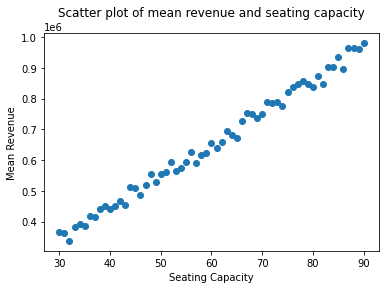

In [65]:
# Scatter plot for mean revenue and seating capacity
plt.scatter(X, y)
plt.xlabel('Seating Capacity')
plt.ylabel('Mean Revenue')
plt.title('Scatter plot of mean revenue and seating capacity')
plt.show()

### (c) 
Compute the sample correlation coefficient.


In [116]:
r = np.corrcoef(X, y)[0, 1]
print("Correlation coefficient: ", r)

Correlation coefficient:  0.9955582755474272


### (d) 
Find the equation of the estimated regression line, and use it to predict a future value for Y.


#### Find the equation

In [84]:
#(d) Find the equation of the estimated regression line, rounded to two decimal places.
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
slope = round(slope, 2)
intercept = round(intercept, 2)
print("The equation of the estimated regression line is: y = ", slope, "x + ", intercept)

The equation of the estimated regression line is: y =  10414.31 x +  29211.6


#### Plot for the estimated regression line

In [ ]:
plt.scatter(X, y)
plt.plot(X, slope * X + intercept, color = 'red')
plt.xlabel('Seating Capacity')
plt.ylabel('Mean Revenue')
plt.title('Scatter plot of mean revenue and seating capacity with estimated regression line')
plt.show()

#### Predict 
I will make a predict for a Japanese cuisine Rural restaurant which have seats capacity from 80 to 90

In [112]:
TEST = mean_revenue[-10:]
TEST['Predicted Revenue'] = slope * TEST['Seating Capacity'] + intercept
TEST['Error'] = abs(TEST['Revenue'] - TEST['Predicted Revenue'])
TEST['Percentage Error'] = TEST['Error'] / TEST['Revenue'] * 100
TEST.sort_values('Percentage Error', ascending = False)

,Seating Capacity,Revenue,Predicted Revenue,Error,Percentage Error
52,82,848885.560161,883185.02,34299.459839,4.040528
56,86,895496.825143,924842.26,29345.434857,3.277000
57,87,964170.313759,935256.57,28913.743759,2.998821
55,85,934210.606978,914427.95,19782.656978,2.117580
58,88,965722.017603,945670.88,20051.137603,2.076285
60,90,980013.746467,966499.50,13514.246467,1.378985
53,83,902946.566544,893599.33,9347.236544,1.035193
59,89,962131.286667,956085.19,6046.096667,0.628407
54,84,903203.111515,904013.64,810.528485,0.089739
51,81,873393.855481,872770.71,623.145481,0.071348


In [109]:
# Show average percentage error
avg_error = TEST['Percentage Error'].mean()
print("Average percentage error: ", avg_error)

Average percentage error:  1.7713885970642163


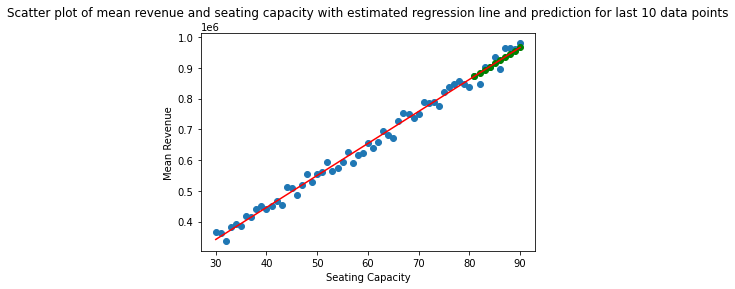

In [105]:
# Plot for the data points and the estimated regression line and the prediction for the last 10 data points
plt.scatter(X, y)
plt.plot(X, slope * X + intercept, color = 'red')
plt.scatter(TEST['Seating Capacity'], TEST['Predicted Revenue'], color = 'green')
plt.xlabel('Seating Capacity')
plt.ylabel('Mean Revenue')
plt.title('Scatter plot of mean revenue and seating capacity with estimated regression line and prediction for last 10 data points')
plt.show()

In [114]:
# Make a preidct for the seating capacity of 100
predict_revenue = slope * 100 + intercept
print("Predicted revenue for seating capacity of 100: ", predict_revenue)

Predicted revenue for seating capacity of 100:  1070642.6
